# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [9]:
# making an API call
import requests

api_endpoint = 'https://pokeapi.co/api/v2/pokemon/'

requests.get(api_endpoint+'psyduck')

pokemon = input('what Pokemon are you looking for? ')

response = requests.get(f'{api_endpoint}{pokemon}')

response.status_code

if response.status_code == 200:
    data= response.json()
    print("success")
else:
    print(f'Error, Status Code {response.status_code}')


what Pokemon are you looking for? psyduck
success


### Display a Pokemon's name, weight, abilities, and types

In [36]:
# get the name
name = data['forms'][0]['name']


In [26]:
# get types
types = data['types']

In [25]:
# get weight
weight = data['weight']

In [21]:
# get abilities
abilities = data['abilities']

In [24]:
[ability_dict['ability']['name'] for ability_dict in abilities]

['damp', 'cloud-nine', 'swift-swim']

In [42]:
# Create a structure for a single pokemon

pokemon = {}

pokemon['name'] = data['forms'][0]['name']
pokemon['types'] = data['types'][0]['type']['name']
pokemon['weight'] = data['weight']
pokemon['abilities'] = [ability_dict['ability']['name'] for ability_dict in abilities]

print(pokemon)


{'name': 'psyduck', 'types': 'water', 'weight': 196, 'abilities': ['damp', 'cloud-nine', 'swift-swim']}


#### Create a function to Pull in your own Pokemon's data 

In [74]:
#access api endpoint with pokemon input
#check status
#access dict keys : abilities, types,name,weight
#store those values in dict
def poke_api_call(pokemon):
    pokemon_dict = {}
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    if response.status_code == 200:
        print('success')
        data = response.json()
        pokemon_dict['name'] = data['forms'][0]['name']
        pokemon_dict['types'] = data['types'][0]['type']['name']
        pokemon_dict['weight'] = data['weight']
        pokemon_dict['abilities'] = data['abilities'][0]['ability']['name']
    else:
        print(f'error bad request {response.status_code}')
        
    return pokemon_dict

print(poke_api_call('squirtle'))


success
{'name': 'squirtle', 'types': 'water', 'weight': 90, 'abilities': 'torrent'}


Choose your pokemon

In [79]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]
print(random_team)

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


[90, 112, 415, 705, 715, 375]


In [82]:
your_team_dict = {pokemon:poke_api_call(pokemon) for pokemon in your_team}

print(your_team_dict)

success
success
success
success
success
success
{'electabuzz': {'name': 'electabuzz', 'types': 'electric', 'weight': 300, 'abilities': 'static'}, 'haunter': {'name': 'haunter', 'types': 'ghost', 'weight': 1, 'abilities': 'levitate'}, 'tyranitar': {'name': 'tyranitar', 'types': 'rock', 'weight': 2020, 'abilities': 'sand-stream'}, 'blaziken': {'name': 'blaziken', 'types': 'fire', 'weight': 520, 'abilities': 'blaze'}, 'marowak': {'name': 'marowak', 'types': 'ground', 'weight': 450, 'abilities': 'rock-head'}, 'dragonair': {'name': 'dragonair', 'types': 'dragon', 'weight': 165, 'abilities': 'shed-skin'}}


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [77]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for i in random_team:
    poke_dict = poke_api_call(i)
    my_six_pokemon[poke_dict['name']] = poke_dict
for k in my_six_pokemon:
    print(k, ' ', my_six_pokemon[k])


success
success
success
success
success
success
foongus   {'name': 'foongus', 'types': 'grass', 'weight': 10, 'abilities': 'effect-spore'}
swampert   {'name': 'swampert', 'types': 'water', 'weight': 819, 'abilities': 'torrent'}
gossifleur   {'name': 'gossifleur', 'types': 'grass', 'weight': 22, 'abilities': 'cotton-down'}
bouffalant   {'name': 'bouffalant', 'types': 'normal', 'weight': 946, 'abilities': 'reckless'}
lombre   {'name': 'lombre', 'types': 'water', 'weight': 325, 'abilities': 'swift-swim'}
steenee   {'name': 'steenee', 'types': 'grass', 'weight': 82, 'abilities': 'leaf-guard'}


## Lets create a class called 'Pokemon' and create our pokemon as instances

In [83]:
pokemon1 = {
    'abilities':['abilities'],
    'name':data['name'],
    'type':data['types'],
    'weight':data['weight']
}

In [47]:
class Pokemon1():
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api()
    def call_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if response.status_code == 200:
            print('success')
            data = response.json()
            self.abilities = [ability_object['ability']['name'] for ability_object in data['abilities']]
            self.type = [type_object['type']['name'] for type_object in data['types']]
            self.weight = data['weight']
            self.image = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
            if not self.image:
                self.image = data['sprites']['other']['dream_world']['front_default']
            if not self.image:
                self.image = data['sprites']['front_default']
        else:
            print(f'Error status code {response.status_code}')
     

success
success
60
['static', 'lightning-rod']
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/25.gif


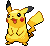

In [48]:
from IPython.display import Image

new_poke = Pokemon1('pikachu', 'zappy rodent')
new_poke.call_poke_api()
print(new_poke.weight)
print(new_poke.abilities)
print(new_poke.image)

display(Image(new_poke.image))



In [49]:
another_poke = Pokemon1('1', 'vine turtle')
another_poke.call_poke_api
print(another_poke.weight)
print(another_poke.abilities)
print(another_poke.image)

success
69
['overgrow', 'chlorophyll']
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/1.gif


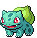

In [50]:
from IPython.display import Image

display(Image(another_poke.image))

success


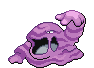

In [51]:
muk = Pokemon1('89', 'mud')
muk.call_poke_api
muk.weight
muk.abilities
muk.image
display(Image(muk.image))

### Let's Catch some Pokemon

In [127]:
rays_pokemon = ['muk','ninetails','klefairy','jigglypuff']

In [130]:
pokedex = {}
for pokemon in rays_pokemon:
    pokedex[pokemon] = Pokemon1(pokemon, 'generic name')
    
print(pokedex)


success
Error status code 404
Error status code 404
success
{'muk': <__main__.Pokemon1 object at 0x0000026A8FF91EB0>, 'ninetails': <__main__.Pokemon1 object at 0x0000026A8FE595B0>, 'klefairy': <__main__.Pokemon1 object at 0x0000026A8FE5E130>, 'jigglypuff': <__main__.Pokemon1 object at 0x0000026A8FE74AF0>}


In [132]:
class Pokedex:
    def __init__(self, username):
        self.username = username
        self.pokemon = {}
        
    def add_pokemon(self, pokemon):
        self.pokemon[pokemon] = Pokemon1(pokemon, 'monster')
new_pokedex = Pokedex('ray')
new_pokedex.add_pokemon('squirtle')
new_pokedex.add_pokemon('mewtwo')
new_pokedex.username
new_pokedex.pokemon

success
success


{'squirtle': <__main__.Pokemon1 at 0x26a903c9460>,
 'mewtwo': <__main__.Pokemon1 at 0x26a903c99d0>}

In [52]:
def print_user_pokemon(pokedex):
    print(f'{pokedex.username}\'s pokemon:')
    poke_dict = pokedex.pokemon
    for poke in pokedex.pokemon:
        print(poke_dict[poke].name)

print_user_pokemon(new_pokedex)

NameError: name 'new_pokedex' is not defined

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [6]:
# Display an image in Jupyter notebook

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [59]:
# recreate your pokemon class here
import requests
from IPython.display import Image

class Pokemon1():
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.pokemon_image
   
    def pokemon_image(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        response.status_code
        if response.status_code == 200:
            print('success')
            data = response.json()
            self.image = data['sprites']['versions']['generation-i']['red-blue']['front_default']




success


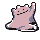

In [58]:
pokemon = Pokemon1('ditto', 'mimic')
pokemon.pokemon_image()

display(Image(pokemon.image))

In [12]:
# Calling our new method



200

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [39]:
import requests
from IPython.display import Image

class Pokemon1():
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.pokemon_image
        self.id = None
        self.poke_list = []
        self.evo_chain = None
        self.evolve_pokemon
        
   
    def pokemon_image(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        response.status_code
        if response.status_code == 200:
            print('success')
            data = response.json()
            self.image = data['sprites']['versions']['generation-i']['red-blue']['front_default']
    
    def evolve_pokemon(self):
        self.poke_list.append(self.name)
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        response.status_code
        if response.status_code != 200:
            print('Pokemon does not exist!')
        else:
            data = response.json()
            self.id = data['id']
            species_url = requests.get(f'https://pokeapi.co/api/v2/pokemon-species/{self.id}/')
            species_data = species_url.json()
            self.evo_chain = species_data['evolution_chain']['url']
            evo_url = requests.get(f'{self.evo_chain}')
            evo_data = evo_url.json()
            res = input(f'{self.name} Would like to Evolve! do you wish to continue?:\n type no to keep keep leveling or press enter to continue with the Evolution process!:\n')
            if res.lower() == 'no':
                print('Okay! Keep leveling!')
            else:
                if evo_data['chain']['evolves_to'] == []:
                    print(f'You have been tricked! {self.name} has no Evolutions!\nHere is your Pokedex: {self.poke_list}')
                else:
                    self.evolve_pokemon = evo_data['chain']['evolves_to'][0]['species']['name']
                    self.poke_list[0] = self.evolve_pokemon
                    print(f'Evolution Complete! {self.name} has been replaced with {self.evolve_pokemon}\nHere is your Pokedex: {self.poke_list}')
                    res_2 = input(f'{self.evolve_pokemon} would like to Evolve! do you wish to continue?:\n type no to keep keep leveling or press enter to continue with the Evolution process!:\n')
                    if res_2.lower() == 'no':
                        print('Okay! Keep leveling!')
                    else:
                        if evo_data['chain']['evolves_to'][0]['evolves_to'] == []:
                            print(f'You have been tricked! {self.evolve_pokemon} has no more Evolutions left!')
                        else:
                            self.evolve_pokemon_2 = evo_data['chain']['evolves_to'][0]['evolves_to'][0]['species']['name']
                            self.poke_list[0] = self.evolve_pokemon_2
                            print(f'Evolution Complete! {self.evolve_pokemon} has been replaces with {self.evolve_pokemon_2}\nHere is your Pokedex: {self.poke_list}')
        
                
                
                

            

new_poke = Pokemon1('spearow', 'flameboy')
new_poke.evolve_pokemon()
            


fearow Would like to Evolve! do you wish to continue?:
 type no to keep keep leveling or press enter to continue with the Evolution process!:

Evolution Complete! fearow has been replaced with fearow
Here is your Pokedex: ['fearow']
fearow would like to Evolve! do you wish to continue?:
 type no to keep keep leveling or press enter to continue with the Evolution process!:

You have been tricked! fearow has no more Evolutions left!


Now let's evolve a few

In [48]:
new_poke = Pokemon1('charmander', 'flameboy')
new_poke.evolve_pokemon()

charmander Would like to Evolve! do you wish to continue?:
 type no to keep keep leveling or press enter to continue with the Evolution process!:

Evolution Complete! charmander has been replaced with charmeleon
Here is your Pokedex: ['charmeleon']
charmeleon would like to Evolve! do you wish to continue?:
 type no to keep keep leveling or press enter to continue with the Evolution process!:

Evolution Complete! charmeleon has been replaces with charizard
Here is your Pokedex: ['charizard']


In [41]:
newpoke = Pokemon1('weedle', 'hornworm')
newpoke.evolve_pokemon()

weedle Would like to Evolve! do you wish to continue?:
 type no to keep keep leveling or press enter to continue with the Evolution process!:

Evolution Complete! weedle has been replaced with kakuna
Here is your Pokedex: ['kakuna']
kakuna would like to Evolve! do you wish to continue?:
 type no to keep keep leveling or press enter to continue with the Evolution process!:

Evolution Complete! kakuna has been replaces with beedrill
Here is your Pokedex: ['beedrill']


In [46]:
newpoke1 = Pokemon1('diglit', 'lesser known "party" diglett')
newpoke1.evolve_pokemon()

Pokemon does not exist!


In [47]:
newpoke2 = Pokemon1('diglett', 'groundthumb')
newpoke2.evolve_pokemon()

diglett Would like to Evolve! do you wish to continue?:
 type no to keep keep leveling or press enter to continue with the Evolution process!:

Evolution Complete! diglett has been replaced with dugtrio
Here is your Pokedex: ['dugtrio']
dugtrio would like to Evolve! do you wish to continue?:
 type no to keep keep leveling or press enter to continue with the Evolution process!:

You have been tricked! dugtrio has no more Evolutions left!


#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [19]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []

In [81]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [79]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
